In [5]:
import numpy
import pandas as pd
# reading csv files
column_names = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
"Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
data =  pd.read_csv('breast-cancer-wisconsin.data', sep=",", names = column_names, na_values=["?"])
print(data.isnull().sum())
print(data.shape)
data.head()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
(699, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [6]:
data = data.dropna()
data.isnull().sum()
data = data.values
data

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [8]:
numpy.random.seed(7)

In [9]:
a = int(len(data)*0.3)
numpy.random.shuffle(data)
X_train = data[a:, :9]
Y_train = data[a:, 9]
X_test = data[:a, :9]
Y_test = data[:a, 9]

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_train)

LabelEncoder()

In [11]:
le.classes_

array([2., 4.])

In [12]:
Y_train = le.transform(Y_train)
Y_train[:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [13]:
le.fit(Y_test)
print("Classes: ", le.classes_)
Y_test = le.transform(Y_test)
Y_test[:10]

Classes:  [2. 4.]


array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________
None


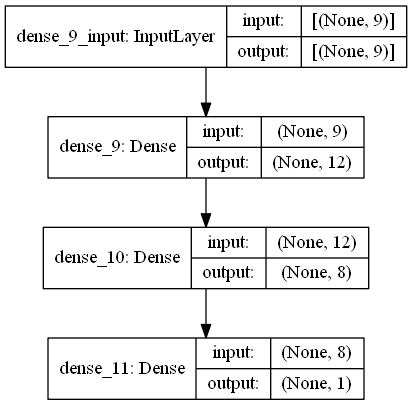

In [28]:
from keras.utils.vis_utils import plot_model
# create model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
h = model.fit(X_train, Y_train, epochs=150, validation_data=(X_test, Y_test), batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7/7 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9657
accuracy: 96.57%


In [30]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


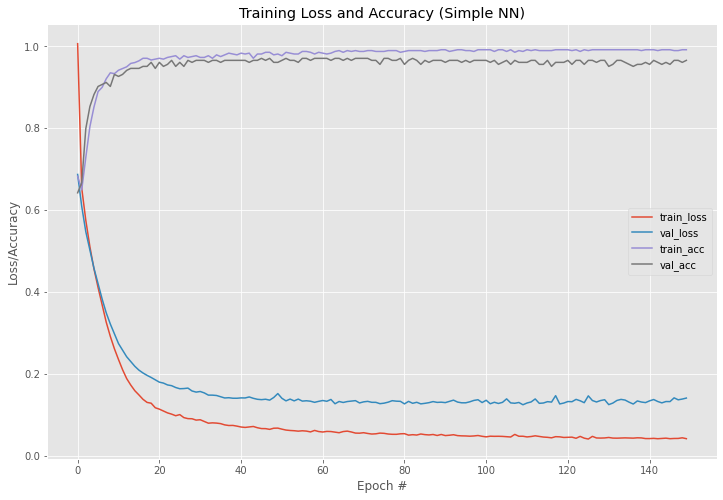

In [31]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = numpy.arange(0, 150)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history['accuracy'], label="train_acc")
plt.plot(N, h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# The End